In [1]:
import tensorflow as tf
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_X, train_Y), (test_X, test_Y) = fashion_mnist.load_data()

train_X = train_X / 255.0
test_X = test_X / 255.0

train_X = train_X.reshape(-1, 28, 28, 1)
test_X = test_X.reshape(-1, 28, 28, 1)

4423680/4422102 [==============================] - 0s 0us/step


In [2]:
# 예제 6.12 : VGGNet 스타일의 Fashion MNIST 분류를 위한 컨볼루션 신경망 모델 정의
model = tf.keras.Sequential([
                             tf.keras.layers.Conv2D(input_shape = (28, 28, 1), kernel_size = (3, 3), filters = 32, padding = 'same', activation = 'relu'),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 64, padding = 'same', activation = 'relu'),
                             tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 128, padding = 'same', activation = 'relu'),
                             tf.keras.layers.Conv2D(kernel_size = (3, 3), filters = 256, padding = 'valid', activation = 'relu'),
                             tf.keras.layers.MaxPool2D(pool_size = (2, 2)),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Flatten(),
                             tf.keras.layers.Dense(units = 512, activation = 'relu'),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Dense(units = 256, activation = 'relu'),
                             tf.keras.layers.Dropout(rate = 0.5),
                             tf.keras.layers.Dense(units = 10, activation = 'softmax')
])

model.compile(optimizer = tf.keras.optimizers.Adam(), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 256)       295168    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 256)         0

In [3]:
history = model.fit(train_X, train_Y, epochs = 25, validation_split = 0.25)

Epoch 1/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.6005 - accuracy: 0.7810 - val_loss: 0.3747 - val_accuracy: 0.8585
Epoch 2/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3706 - accuracy: 0.8664 - val_loss: 0.2811 - val_accuracy: 0.8964
Epoch 3/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.3271 - accuracy: 0.8826 - val_loss: 0.2630 - val_accuracy: 0.9004
Epoch 4/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.3003 - accuracy: 0.8924 - val_loss: 0.2620 - val_accuracy: 0.9037
Epoch 5/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2862 - accuracy: 0.8977 - val_loss: 0.2342 - val_accuracy: 0.9137
Epoch 6/25
1407/1407 [==============================] - 8s 6ms/step - loss: 0.2768 - accuracy: 0.9004 - val_loss: 0.2350 - val_accuracy: 0.9120
Epoch 7/25
1407/1407 [==============================] - 9s 6ms/step - loss: 0.2675 - accuracy: 0.9046 - val_loss: 0.2715 - val_accuracy:

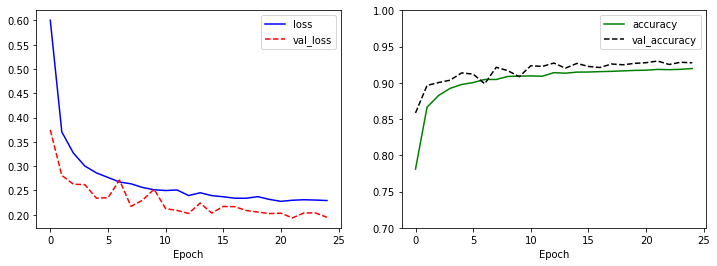

313/313 [==============================] - 1s 3ms/step - loss: 0.2100 - accuracy: 0.9263


[0.20998382568359375, 0.9262999892234802]

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize = (12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], 'b-', label = 'loss')
plt.plot(history.history['val_loss'], 'r--', label = 'val_loss')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], 'g-', label = 'accuracy')
plt.plot(history.history['val_accuracy'], 'k--', label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylim(0.7, 1)
plt.legend()

plt.show()

model.evaluate(test_X, test_Y)